### Introduction:
>In the project I used a Convolutional Neural Network (CNN) to recognize hand gestures and associate them with their corresponding American alphabet letters. Started by loading the data and performing some visualizations. then the model is trained, followed by testing its performance.

### Dataset:
>Dataset from kaggle it represents American Sign Language (ASL) which is a complete language, distinct from English, expressed through hand and facial movements. The Sign Language MNIST dataset, akin to MNIST, comprises 27,455 training cases and 7,172 test cases. Each case represents a label (0-25) corresponding to the alphabetic letters A-Z, excluding J (9) and Z (25). The dataset follows MNIST's structure, with a header row indicating the label and pixel values for a 28x28 pixel grayscale image (0-255). The original dataset featured hand gestures by various users against diverse backgrounds. To expand the dataset, an image pipeline involving cropping, grayscale conversion, resizing, and generating 50+ variations was used.

![ASL](https://miro.medium.com/v2/resize:fit:720/format:webp/1*MLudTwKUYiCYQE0cV7p6aQ.png)

### Importing libraries

In [1]:
# Data processing
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

# Visulisation
import matplotlib.pyplot as plt
import seaborn as sns

# Model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

#### Loading Data

In [2]:
train_df = pd.read_csv("Data/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("Data/sign_mnist_test/sign_mnist_test.csv")

In [3]:
test = pd.read_csv("Data/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

#### Exploring Data

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


C:\Users\amr\AppData\Local\Temp\ipykernel_5536\1076965551.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=train_df, palette="Set2")


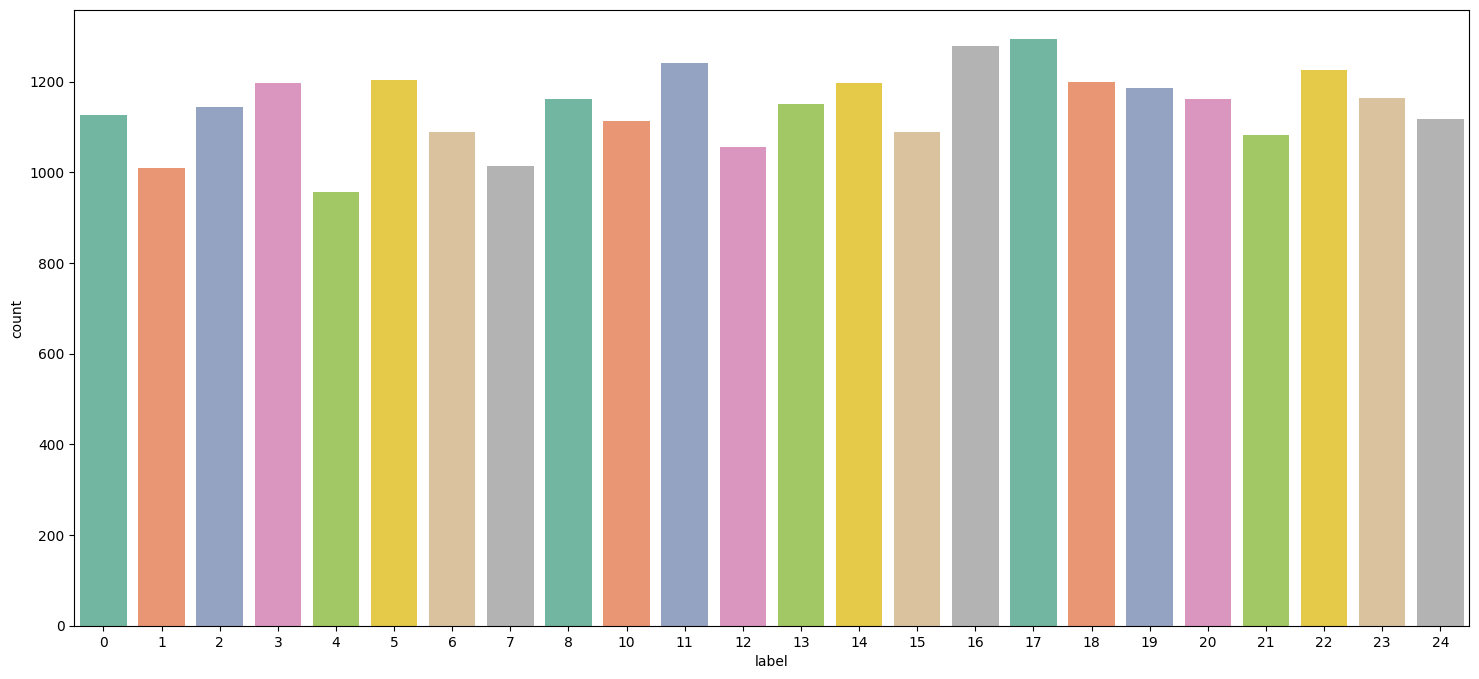

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='label', data=train_df, palette="Set2")
plt.show()

##### Conclusion
>Our dataset has balanced category counts, and although it's not very large, we can enhance it by using data augmentation techniques.

### Process Data

In [9]:
y_train = train_df['label']
y_test = test_df['label']

train_df = train_df.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)

In [10]:
# convert y_train and y_test to binary vector
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [11]:
print('y_train: ',y_train)
print('y_test: ',y_test)

y_train:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
y_test:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [14]:
x_train = train_df.values
x_test = test_df.values

In [16]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [18]:
x_train.shape

(27455, 28, 28, 1)

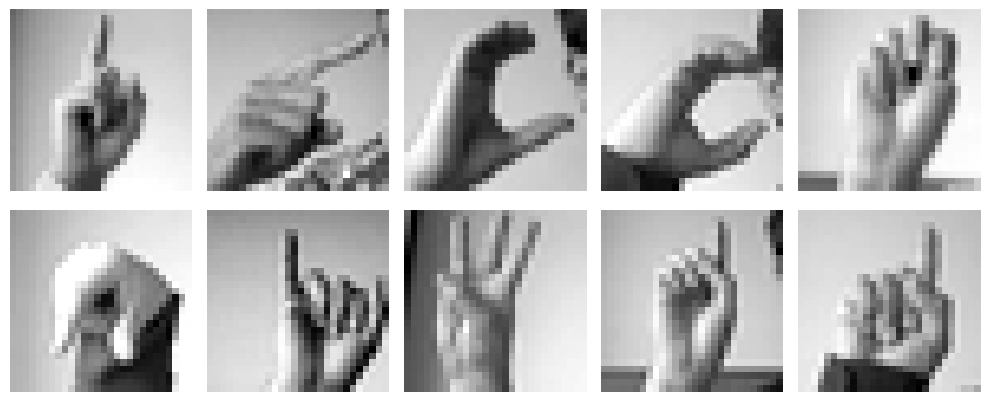

In [19]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 5)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        ax[i, j].axis('off')
        k += 1
    plt.tight_layout()

### Data augmentation
>It is a technique used in machine learning, particularly in computer vision tasks such as image classification. It involves applying various transformations to the training data to artificially increase the size of the dataset without actually doing it and introduce variability, which can help prevent overfitting and improve the model's generalization performance.

In [20]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### Training the Model

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

### Model Architecture

#### Input Layer:
> Type: Conv2D
>Filters: 75
>Kernel Size: (3,3)
>Strides: 1
>Padding: 'same'
>Activation Function: 'relu'
>Input Shape: (28,28,1)

#### Normalization:
> Type: BatchNormalization
>Pooling Layer:
>Type: MaxPool2D
>Pool Size: (2,2)
>Strides: 2
>Padding: 'same'

#### Convolutional Layer:
>Type: Conv2D
>Filters: 50
>Kernel Size: (3,3)
>Strides: 1
>Padding: 'same'
>Activation Function: 'relu'

#### Dropout Layer:
>Rate: 0.2
>Normalization:
>Type: BatchNormalization

#### Pooling Layer:
>Type: MaxPool2D
>Pool Size: (2,2)
>Strides: 2
>Padding: 'same'

#### Convolutional Layer:
>Type: Conv2D
>Filters: 25
>Kernel Size: (3,3)
>Strides: 1
>Padding: 'same'
>Activation Function: 'relu'

#### Normalization:
>Type: BatchNormalization

#### Pooling Layer:
>Type: MaxPool2D
>Pool Size: (2,2)
>Strides: 2
>Padding: 'same'

#### Flatten Layer:
>Type: Flatten
>Fully Connected Layer (Dense):
>Units: 512
>Activation Function: 'relu'

#### Dropout Layer:
>Rate: 0.3

#### Output Layer:
>Type: Dense
>Units: 24 classes (all alphapit expect J and Z)
>Activation Function: 'softmax'.

The model is designed for image classification tasks with 24 classes and employs convolutional layers for feature extraction, batch normalization for stabilization, max pooling for down-sampling, and dense layers for classification. The dropout layers help prevent overfitting during training.

In [22]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)      

In [23]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20


215/215 [==============================] - 38s 168ms/step - loss: 1.0382 - accuracy: 0.6728 - val_loss: 3.3963 - val_accuracy: 0.1368 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 36s 167ms/step - loss: 0.2295 - accuracy: 0.9248 - val_loss: 0.8177 - val_accuracy: 0.7267 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 36s 166ms/step - loss: 0.1044 - accuracy: 0.9669 - val_loss: 0.1262 - val_accuracy: 0.9635 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 36s 167ms/step - loss: 0.0746 - accuracy: 0.9762 - val_loss: 0.0779 - val_accuracy: 0.9746 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 36s 166ms/step - loss: 0.0478 - accuracy: 0.9853 - val_loss: 0.0353 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 36s 167ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.0263 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 7/20
215/215 [==============================

### Evaluating the Model

In [24]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 3s 12ms/step - loss: 0.0025 - accuracy: 0.9987
Accuracy of the model is -  99.87451434135437 %


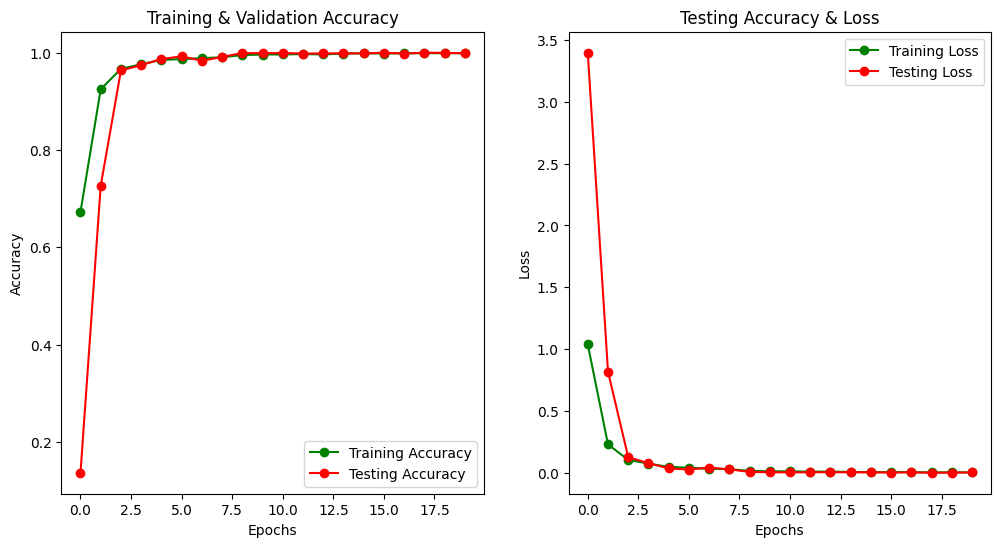

In [25]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(12,6)
# green and red, o points and -
ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
# green and red, o points and -
ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [28]:
predictions = np.argmax(model.predict(x_test),axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions

225/225 [==============================] - 3s 11ms/step


array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [29]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [30]:
cm = confusion_matrix(y,predictions)

In [31]:
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

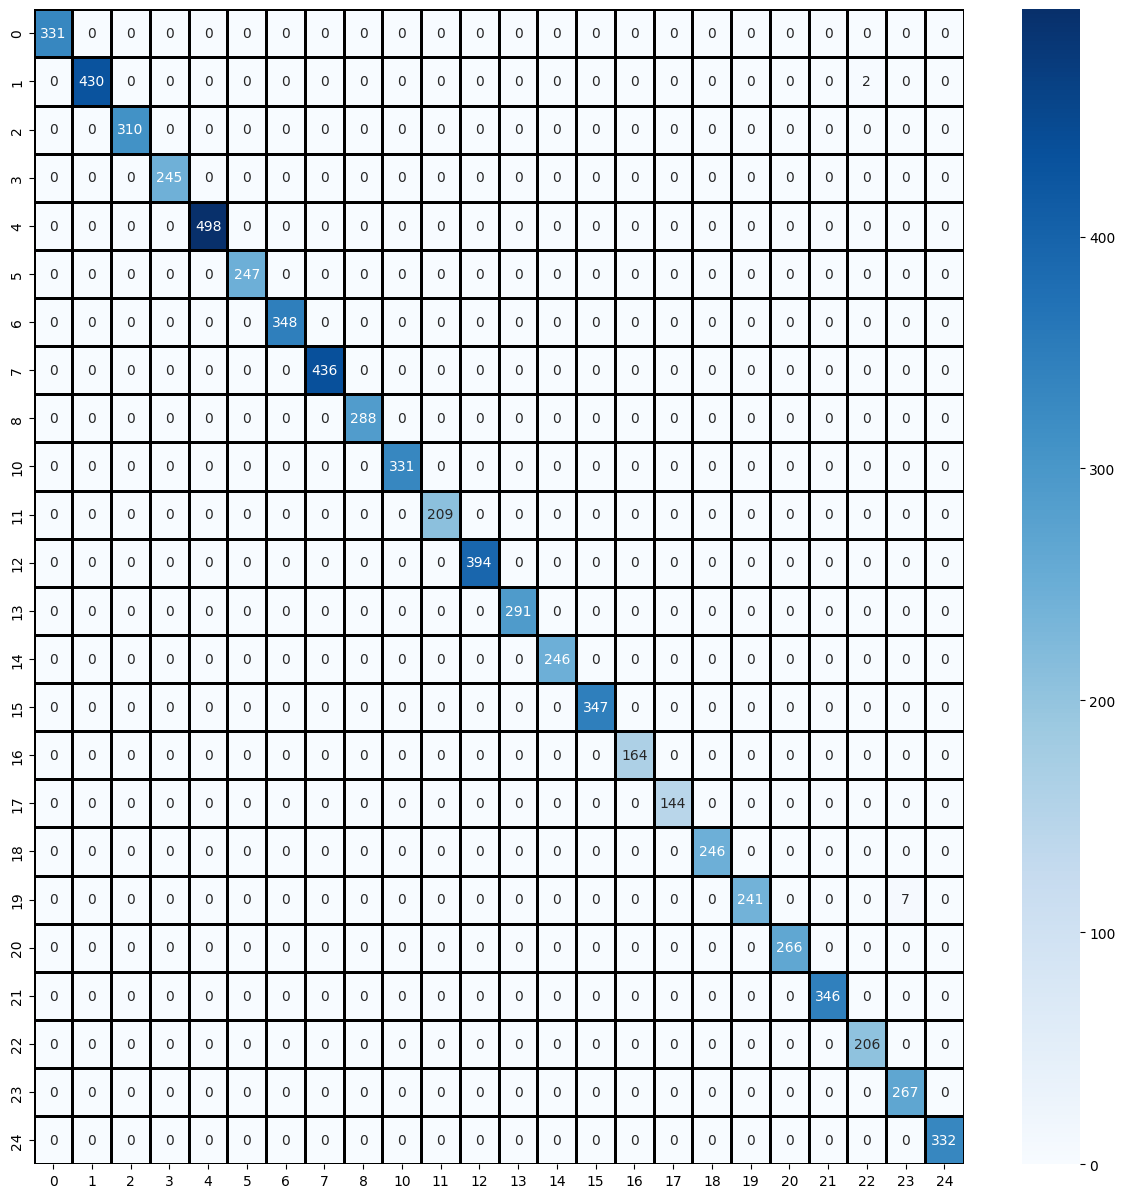

In [32]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='');

In [35]:
correct = np.nonzero(predictions == y.values)[0]

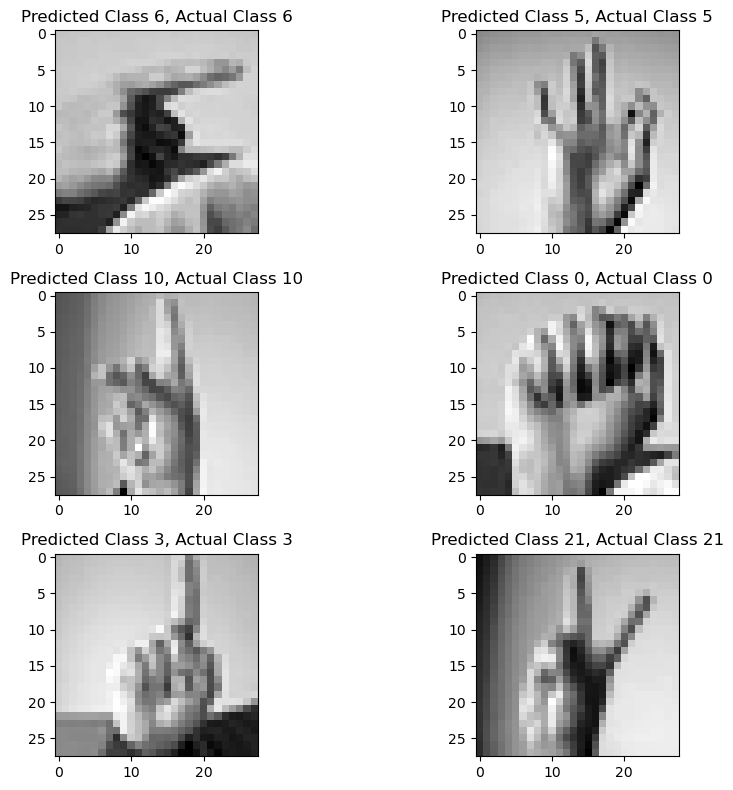

In [55]:
i = 0
plt.figure(figsize=(10, 8))

for c in correct[:6]:
    plt.subplot(3, 2, i + 1)
    plt.imshow(x_test[c].reshape(28, 28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class {}".format(predictions[c], y[c]))
    i += 1

plt.tight_layout()
plt.show()


### Saving the Model

In [58]:
model.save("hand_33.model")

INFO:tensorflow:Assets written to: hand_33.model\assets


INFO:tensorflow:Assets written to: hand_33.model\assets


### Using model with real images

In [7]:
model = tf.keras.models.load_model("hand_33.model")

In [21]:
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, (28, 28), interpolation=cv2.INTER_CUBIC)

    img_normalized = img_resized.astype('float32') / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=-1)
    img_expanded = np.expand_dims(img_expanded, axis=0)

    return img_expanded, img_resized

def predict_image(model, image_path, figsize=(2, 2)):
    preprocessed_image, original_image = preprocess_image(image_path)
    
    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    if predicted_class >= 9:
        predicted_class += 1
    
    plt.figure(figsize=figsize)
    plt.imshow(original_image, cmap="gray")
    plt.title(f"Image after resizing\nPredicted Class: {predicted_class}")
    plt.show()
    
    return predicted_class

class_mapping = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 10: "K",
                 11: "L", 12: "M", 13: "N", 14: "O", 15: "P", 16: "Q", 17: "R", 18: "S", 19: "T",
                 20: "U", 21: "V", 22: "W", 23: "X", 24: "Y"}

1/1 [==============================] - 0s 39ms/step


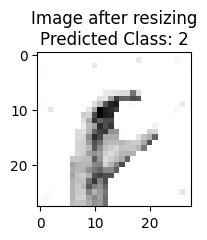

Predicted class: 2
Predicted label: C


In [22]:
image_path = "tesstt/letterC.jpg"
predicted_class = predict_image(model, image_path)
predicted_label = class_mapping.get(predicted_class, "Unknown")
print(f"Predicted class: {predicted_class}")
print(f"Predicted label: {predicted_label}")


1/1 [==============================] - 0s 37ms/step


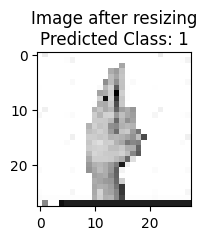

Predicted class: 1
Predicted label: B


In [23]:
image_path = "tesstt/letterB.jpg"
predicted_class = predict_image(model, image_path)
predicted_label = class_mapping.get(predicted_class, "Unknown")
print(f"Predicted class: {predicted_class}")
print(f"Predicted label: {predicted_label}")

1/1 [==============================] - 0s 42ms/step


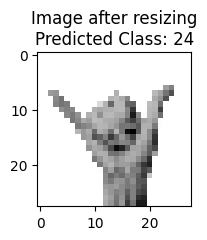

Predicted class: 24
Predicted label: Y


In [26]:
image_path = "tesstt/letterY.jpg"
predicted_class = predict_image(model, image_path)
predicted_label = class_mapping.get(predicted_class, "Unknown")
print(f"Predicted class: {predicted_class}")
print(f"Predicted label: {predicted_label}")

<hr>

<div style="text-align:center;">
    <h2>&nbsp &nbsp &nbsp&nbsp Thank you.</h2>
 Amr AbdElraouf Elkfrawy<br>
</div>

<hr>
